# Pendahuluan

Cardiovascular Disease (CvDs) merupakan penyakit jantung yang menjadi penyebab kematian nomor satu pada tingkat global dengan kasus lebih dari 10 juta kasus kematian per tahun. Penyakit ini terjadi oleh banyak faktor salah satunya adalah hipertensi. Pendektesian dini penyakit jantung diperlukan untuk beberapa kelompok yang beresiko tinggi guna mendapatkan penanganan serta pencegahan yang tepat. Untuk itu tujuan yang ingin dicapai adalah dapat memprediksi secara tepat berdasarkan beberapa feature yang menunjang prediksi. Dengan harapan ketika diprediksi mempunyai penyakit jantung dapat di tangani lebih awal. 

**Problem**

Masalah yang ingin kita selesaikan adalah melakukan diagnosa pasien penderita penyakit jantung secara tepat dan akurat. Perlu dilakukan analisis faktor-faktor penyebab dan gejala penyakit jantung pada pasien.

### Datasets

Dataset yang dipergunakan untuk pemodelan machine learning ini adalah datasets yang di dapatkan dari UCI ML: https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset ini sendiri merupakan dataset yang sudah ada dari tahun 1988 yang tersusun dari beberapa database. Feature **"target"** merupakan ada tidak nya penyakit jantung pada pasien yang bernilai **0 jika tidak & 1 jika ya**

Dataset ini terdiri dari 13 feature dan 1 target, yaitu:

1. **age**,
feature yang menyatakan umur

2. **sex**,
feature yang menyatakan jenis kelamin, bernilai **1 untuk pria & 0 untuk wanita**

3. **cp**,
feature yang merupakan kepanjangan dari chest pain type, menyatakan nyeri dada bernilai **1 untuk type angina, 2 untuk tidak stabil, 3 untuk tidak stabil parah, 4 untuk tidak terikat dengan jantung**

4. **trestbps**,
feature Resting blood pressure, menyatakan tekanan darah saat istirahat (mmHg)

5. **chol**,
feature kolesterol, menyatakan kadar kolesterol dalam serum darah pasien (mg/dl)

6. **fbs**,
feature tekanan gula darah saat puasa, bernilai **1 jika kadar gula darah < 120 mg/dl & 0 jika > 120 mg/dl**

7. **restecg**,
feature yang menyatakan hasil elektrokardiogram pasien saat istirahat, bernilai **0 untuk normal, 1 untuk adanya kelainan, 2 untuk hipertrofi ventrikel kiri**

8. **thalach**,
feature yang menyatakan detak jantung maksimum yang dicapai saat olahraga (bpm)

9. **exang**,
feature yang menyatakan apakah pasien mengalami nyeri dada yang disebabkan oleh olahraga, bernilai **0 untuk tidak & 1 untuk ya**

10. **oldpeak**,
feature yang menyatakan seberapa banyak ST segmen yang menurun/depresi saat aktivitas fisik

11. **slope**,
feature yang menyatakan kemiringan segmen ST pada elektrokardiogram dengan **maksimal nilai adalah 3**

12. **ca**,
feature yang menyatakan jumlah pembuluh darah utama yang bernilai **0 sampai 3** (terlihat pada saat pemeriksaan flourosopi)

13. **thal**, 
feature yang menyatakan tes thalium, bernilai **1 untuk normal, 2 untuk defek pada thalassemia, 3 untuk defek yang dapat dipulihkan**

14. **target**,
feature yang menyatakan ada tidaknya penyakit jantung, berniai **0 jika tidak & 1 jika ya**


**Metrics**

Tahap untuk mendukung dalam menyelesaikan problem statement yang ada dan akan digunakan untuk memantau kinerja solusi. Berikut metrics yang termasuk :
1. Jumlah Penderita penyakit jantung
2. Proporsi pasien pria dan wanita yang mengalami penyakit jantung
3. Usia rata rata pasien yang terkena penyakit jantung
4. Korelasi penyakit jantung terhadap tiap variabel yang ada pada dataset (kolestrol, tekanan darah, jenis kelamin, kadar gula darah, detak jantung maksumun selama tes latihan, dan variabel lainnya)

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import math 
import random 
import seaborn as sns 
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings 
import pickle
warnings.filterwarnings("ignore")


%matplotlib inline

## Section 1
### Data Preparation

In [2]:
# import dataset
data = pd.read_csv("heart_disease.csv")

In [3]:
# Show top 5 data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Show tail data
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Show totals of dataset
data.shape

(1025, 14)

In [6]:
# Show name of columns within dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# Show analytics of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Show uniue data of each column
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
# Show information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Section 2

### Data handler

In [10]:
# Handling each columns for turn into categorical 
lists = ['sex','cp','fbs','restecg','exang','slope','thal','ca','target']
data[lists] = data[lists].astype(object)

In [11]:
# see difference 
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [12]:
# Hanlde of labeling
# Labeling categorical data
# make function for labeling
def labelingCat(data, mappings):
    for column, mapping in mappings.items():
        data[column] = data[column].replace(mapping)

In [13]:
# make array for fullfill mappings
mappings = {
    'sex': {1: 'Male', 0: 'Female'},
    'cp': {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'},
    'fbs': {0: 'No', 1: 'Yes'},
    'restecg': {0: 'probable or definite left ventricular hypertrophy', 1: 'normal', 2: 'ST-T Wave abnormal'},
    'exang': {0: 'No', 1: 'Yes'},
    'slope': {0: 'downsloping', 1: 'flat', 2: 'upsloping'},
    'thal': {1: 'normal', 2: 'fixed defect', 3: 'reversible defect'},
    'ca': {0: 'Number of major vessels: 0', 1: 'Number of major vessels: 1', 2: 'Number of major vessels: 2', 3: 'Number of major vessels: 3'},
    'target': {0: 'No disease', 1: 'Disease'}
}

In [14]:
# do labeling using function labelingCat
labelingCat(data, mappings)

In [15]:
# show top 5 record of dataset after labeling
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversible defect,No disease
1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversible defect,No disease
2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversible defect,No disease
3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversible defect,No disease
4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease


In [16]:
# Separate data based on datatype
numericals = data.select_dtypes(exclude='object')
categoricals = data.select_dtypes(exclude=['int64', 'float64'])

In [17]:
# Checking
for i in categoricals:
    print(f"Here the information : {i} with unique {data[i].unique()}")
    print()

Here the information : sex with unique ['Male' 'Female']

Here the information : cp with unique ['typical angina' 'atypical angina' 'non-anginal pain' 'asymptomatic']

Here the information : fbs with unique ['No' 'Yes']

Here the information : restecg with unique ['normal' 'probable or definite left ventricular hypertrophy'
 'ST-T Wave abnormal']

Here the information : exang with unique ['No' 'Yes']

Here the information : slope with unique ['upsloping' 'downsloping' 'flat']

Here the information : ca with unique ['Number of major vessels: 2' 'Number of major vessels: 0'
 'Number of major vessels: 1' 'Number of major vessels: 3' 4]

Here the information : thal with unique ['reversible defect' 'fixed defect' 'normal' 0]

Here the information : target with unique ['No disease' 'Disease']



Terlihat ada kesalahan terhadap feature "ca" dan "thal"
1. feature **ca** yang seharusnya hanya **0-3**, pada data ada yang bernilai 4. Maka dari itu harus dilakukan impute nilai 4 menjadi Nan
2. feature **thal** yang seharusnya hanya **1-3** pada data ada yang bernilai 0. Maka dari itu harus dilakukan impute nilai 0 menjadi Nan

In [18]:
# show value of ca column
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
4                              18
Name: count, dtype: int64

In [19]:
# impute ca columns that having 4 for values into nan

# Ada 18 value yang bernilai 4, kemudian lakukan impute menjadi Nan


data.loc[data['ca']==4,'ca'] = np.nan

In [20]:
# check again ca column
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
Name: count, dtype: int64

In [21]:
# do the same thin on thal column

# Ada 578 value yang bernilai 0, kemudian lakukan impute menjadi Nan

data.loc[data['thal']==0,'thal'] = np.nan
data['thal'].value_counts()

thal
fixed defect         544
reversible defect    410
normal                64
Name: count, dtype: int64

### Handling Missing Values

In [22]:
# Show missing values for each column
print(f"Missing value for each column is:\n {data.isnull().sum()}")

Missing value for each column is:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64


In [23]:
# impute missing values of ca & thal using mode, the impute methode is using function
def imputeMode(data, column):
    modes = data[column].mode()[0]
    data[column] = data[column].fillna(modes)

In [24]:
imputeMode(data, 'thal')
imputeMode(data, 'ca')

In [25]:
# Checking after imputations
print(f"Missing value for each column is:\n {data.isnull().sum()}")

Missing value for each column is:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [26]:
# Checking duplicates
data.duplicated().sum()

723

In [27]:
# drop duplicates data
data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

### EDA

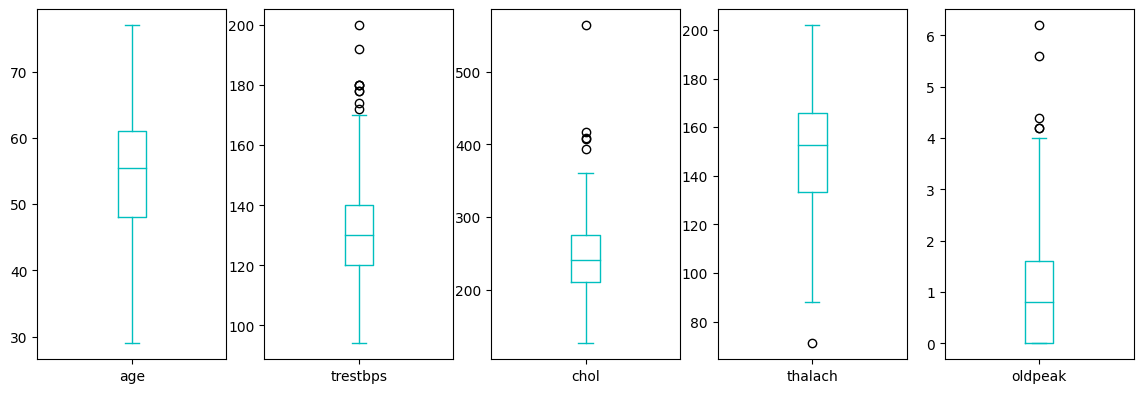

In [28]:
# Show boxplot
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'c')
plt.show()

**Terlihat ada beberapa Outliers pada feature testbps, chol, thalach & oldpeak**

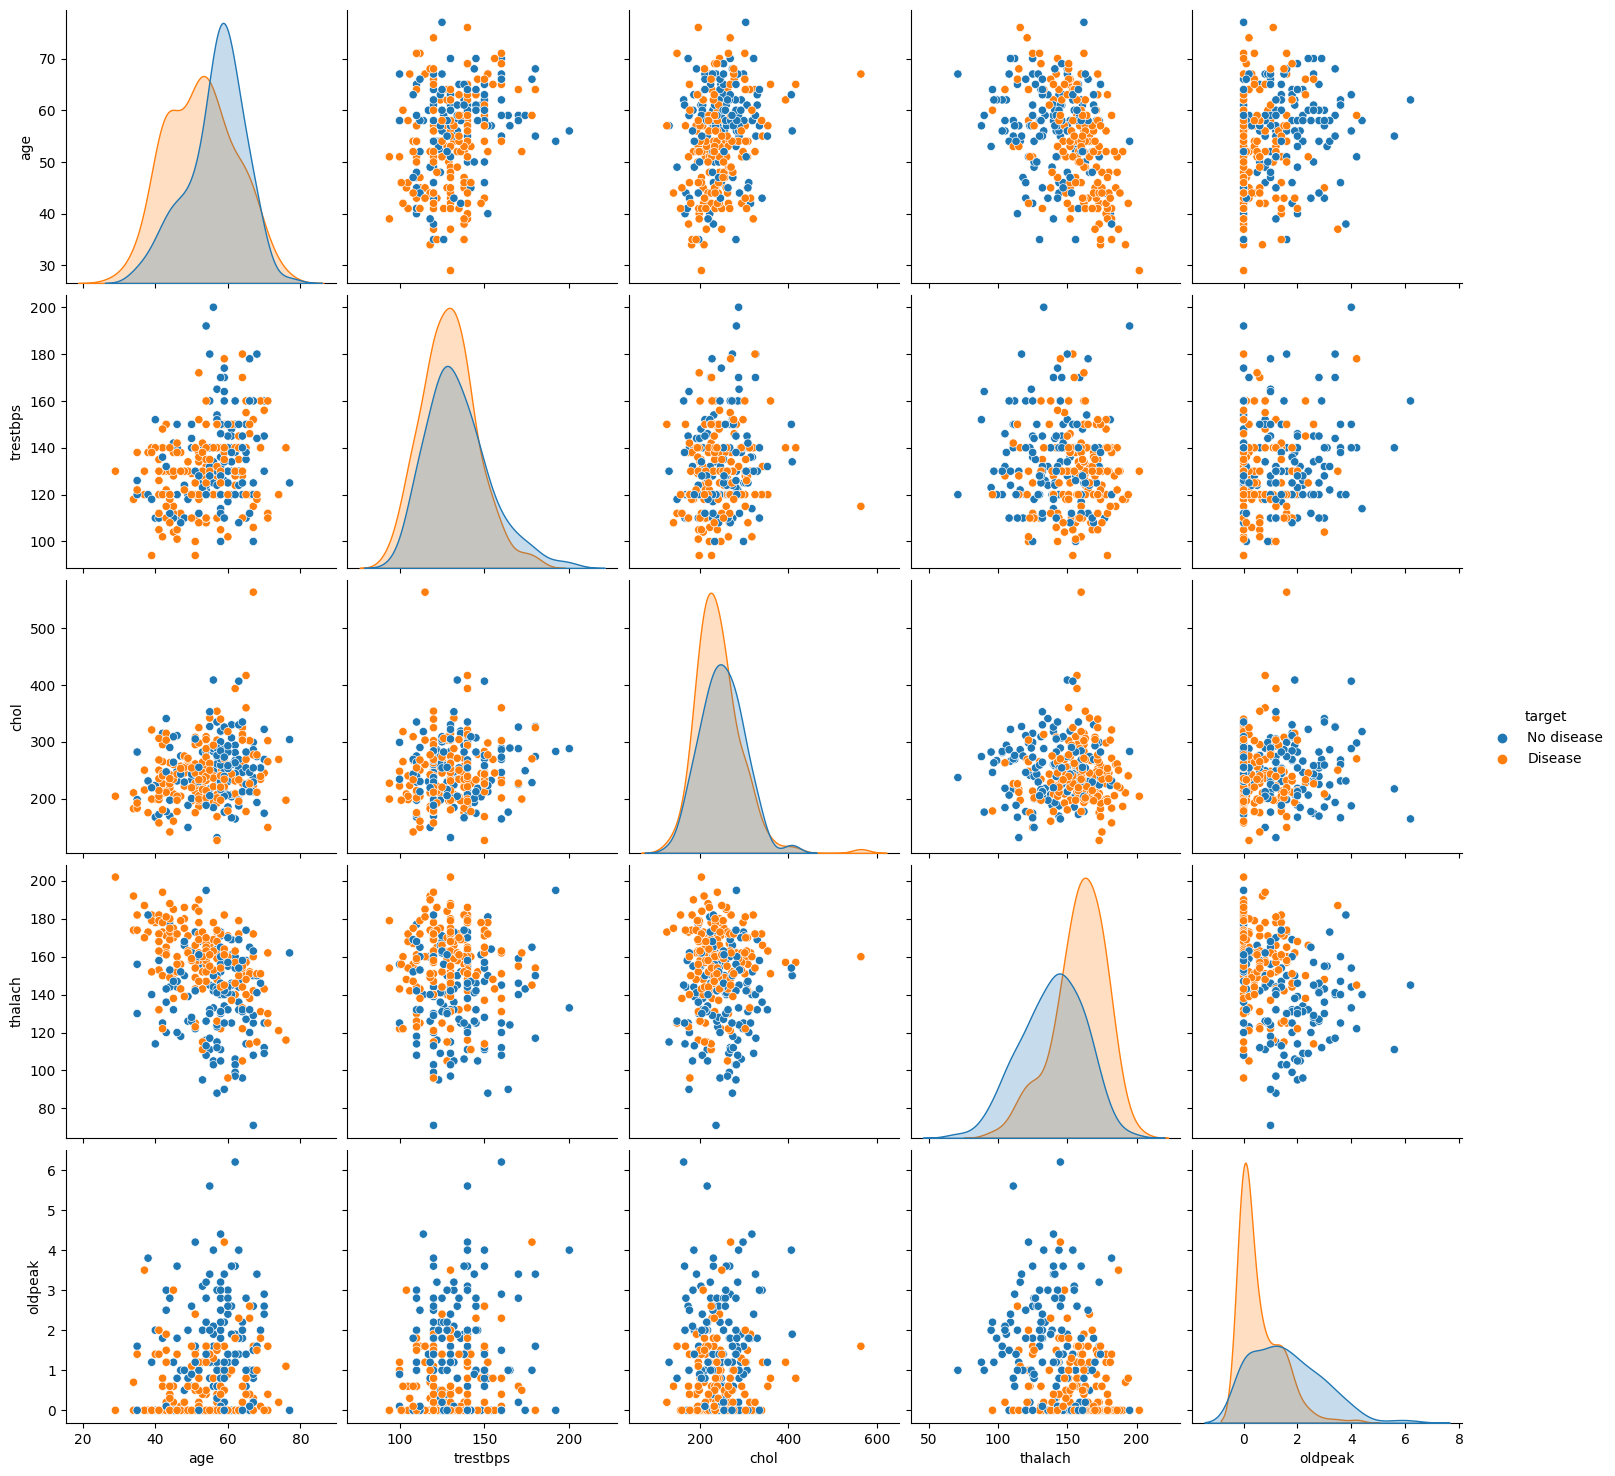

In [29]:
# Show pairplot
sns.pairplot(data=data, vars=numericals, hue='target', height=3)
plt.show()

**Dapat dilihat pengaruh kolom age, trestbps, chol, thalach & oldpeak terhadap target**

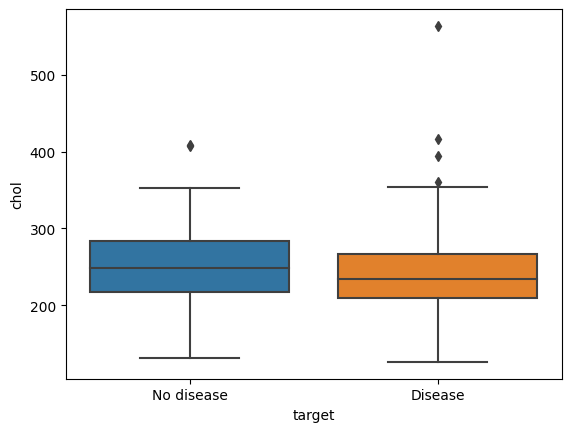

In [30]:
# Show ouliers at chol
sns.boxplot(x=data['target'],y=data['chol'],data=data)
plt.show()

**Graphic tersebut menunjukan outliers pada kolom chol terhadap target**

In [31]:
# checking ouliers using function
listFeatures = ['age', 'chol', 'thalach', 'oldpeak']
def outliers(data, drop=False):
    for features in data.columns:
        if features in listFeatures: 
            datas = data[features]
            Q1 = np.percentile(datas, 25.)
            Q3 = np.percentile(datas, 75.)
            IQR = Q3 - Q1
            steps = IQR * 1.5
            outliers = datas[~((datas >= Q1 - steps) & (datas <= Q3 + steps))].index.tolist()
            if not drop:
                print(f"Features {features} has {len(outliers)} outliers")
            if drop:
                data.drop(outliers, inplace=True, errors='ignore')
                print(f"Outliers from {features} has been removed")
outliers(data)

Features age has 0 outliers
Features chol has 5 outliers
Features thalach has 1 outliers
Features oldpeak has 5 outliers


In [32]:
# Remove outlires
outliers(data,drop=True)

Outliers from age has been removed
Outliers from chol has been removed
Outliers from thalach has been removed
Outliers from oldpeak has been removed


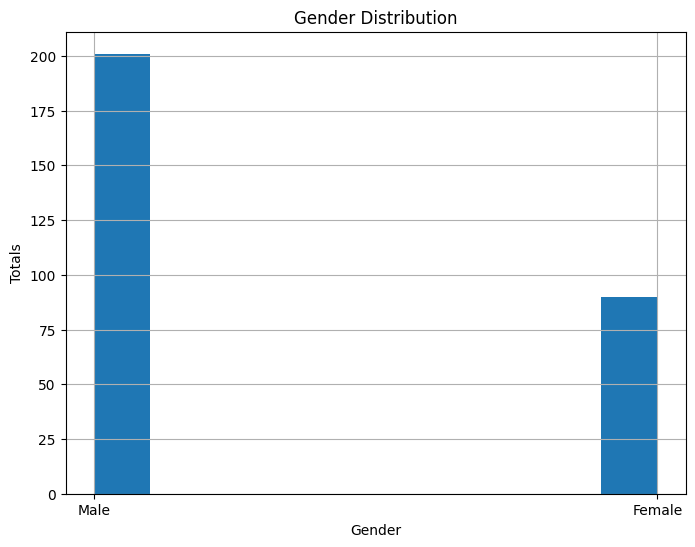

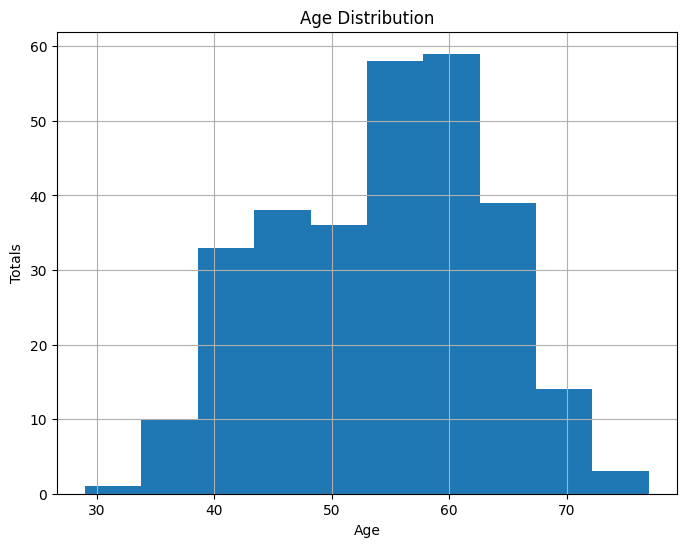

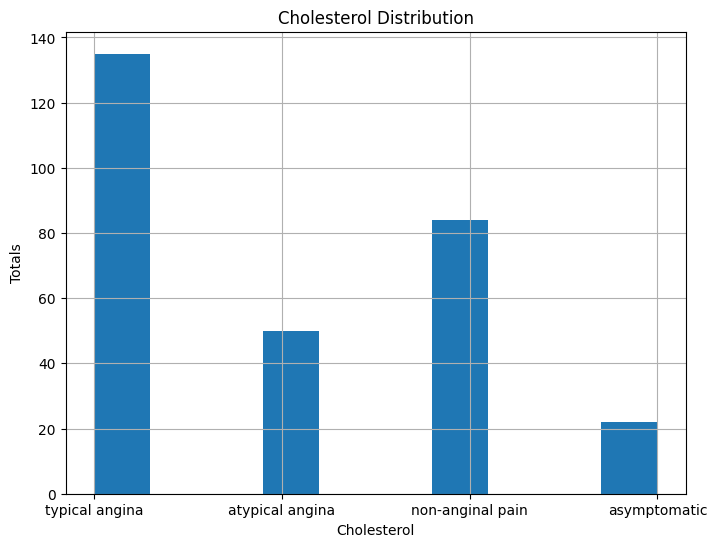

In [33]:
# Show Plot Histogram using function
def plotHist(data, column_name, title, x, y):
    plt.figure(figsize=(8, 6))
    data[column_name].hist()
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

plotHist(data, 'sex', 'Gender Distribution', 'Gender', 'Totals')
plotHist(data, 'age', 'Age Distribution', 'Age', 'Totals')
plotHist(data, 'cp', 'Cholesterol Distribution', 'Cholesterol', 'Totals')

**Dapat Dilihat persebaran data target melalui beberapa kolom pada graphic diatas**

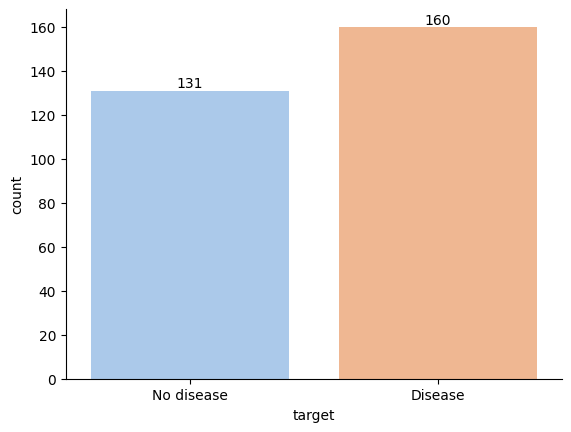

In [34]:
# chek imbalance data
ax = sns.countplot(x=data['target'],data=data, palette='pastel')
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

Pada saat melakukan pengecekan Imbalance data, data yang ada terlihat cukup balance dikarenakan tidak terdapat perbedaan yang signifikan, dengan perbandingan **54,9%** untuk yang terdiagnosa Disease & **45,1%** untuk yang terdiagnosa No disease

In [35]:
# Show descriptif static data
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.192440,131.316151,243.120275,150.027491,0.961856
std,9.089824,17.471249,44.836823,22.670182,1.043348
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.600000
75%,60.500000,140.000000,273.000000,167.500000,1.600000
max,77.000000,200.000000,360.000000,202.000000,4.000000


Dari data statistik tersebut dapat disimpulkan dari 291 data yang ada,

1. rata-rata umur pasien adalah **5.19 tahun dengan rentang dari 29 sampai 77 tahun**
2. rata-rata tekanan darah saat istirahat adalah **131.31 mmHg dengan rentang 94 sampai 200 mmHg**
3. rata-rata kolesterol dalam serum darah adalah **243.12 mg/dl dengan rentang 126 sampai 360 mg/dl**
4. rata rata detak jantung maksimal saat olahraga adalah **150.02 bpm dengan rentang 88 sampai 202 bpm**
5. rata-rata tingkat depresi ST adalah **0.96 dengan rentang 0.0 sampai 4.0**

### Visualisation

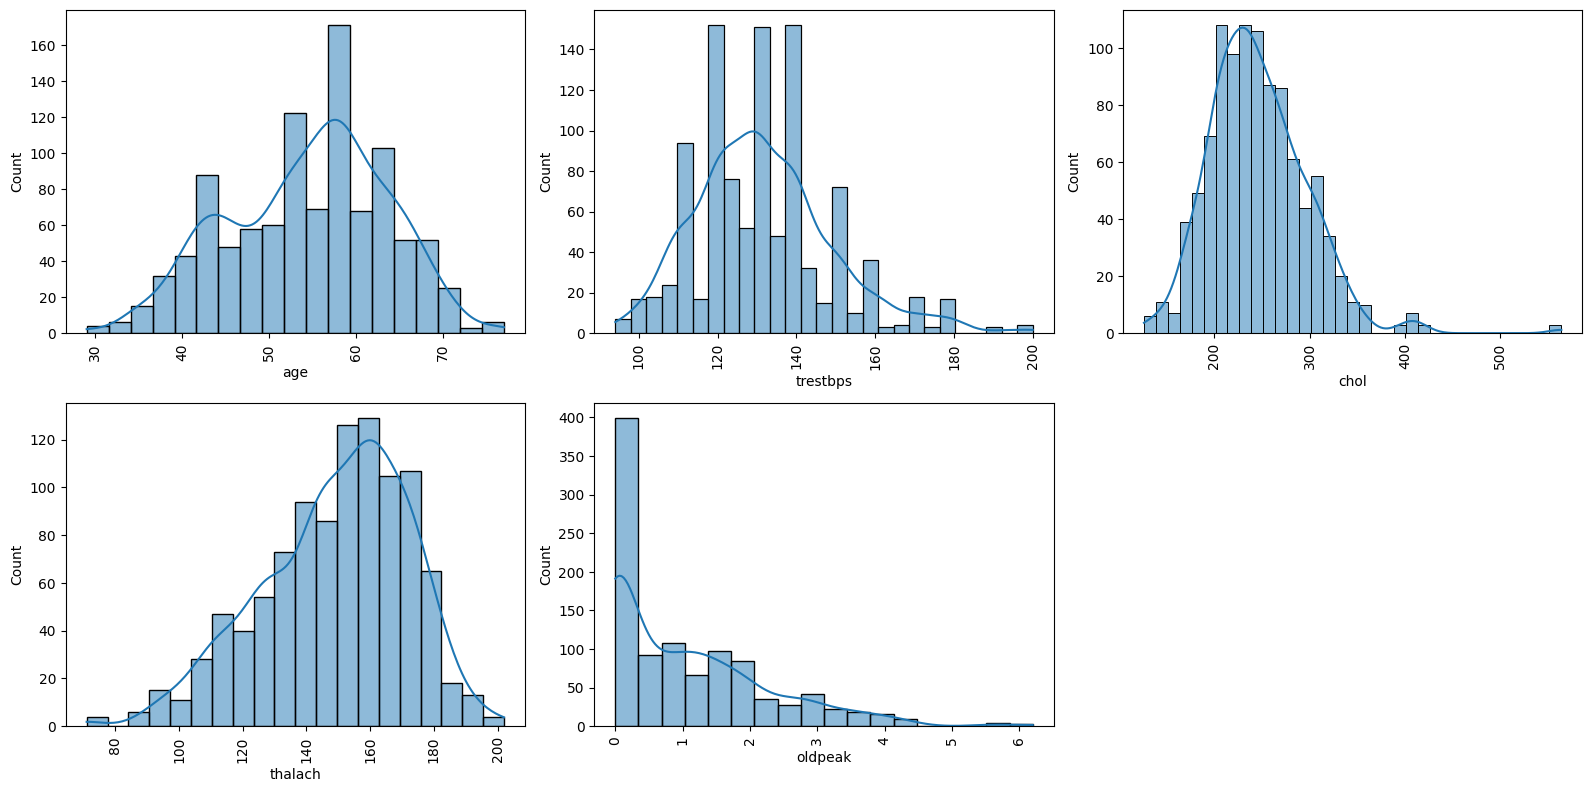

In [36]:
# Distribution of numeric features
plt.figure(figsize=(16,8))
for index,column in enumerate(numericals):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numericals,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

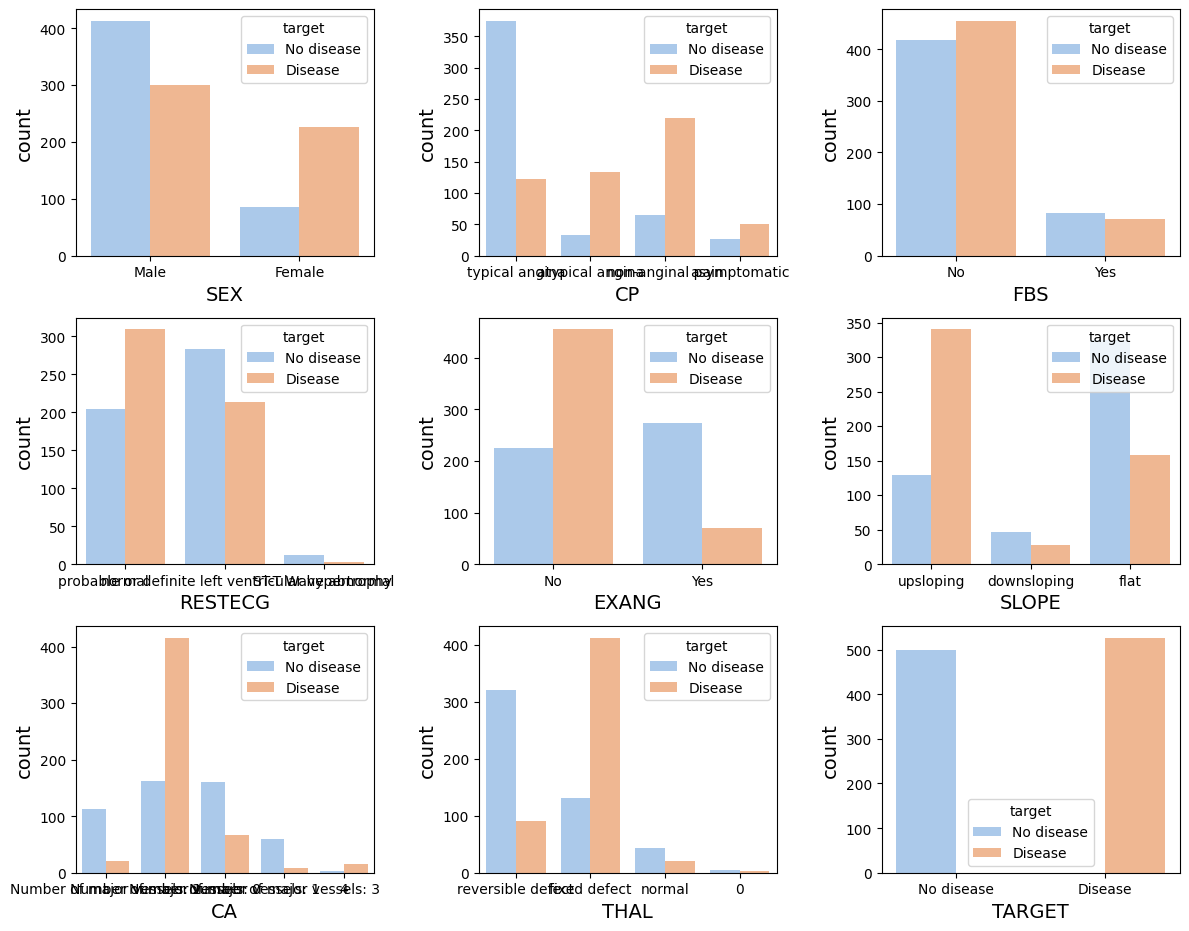

In [37]:
# Distribution of categoric features
plt.figure(figsize=(12,12))
for index, column in enumerate(categoricals):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=categoricals,x=column, hue='target', palette='pastel')
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

In [38]:
# Save labeled data
data.to_csv('data_labeled.csv')

In [39]:
# declare new dataset
df = pd.read_csv('data_labeled.csv', index_col=0)

In [40]:
# reverse labeling
def labelingCatReverse(data, mappings):
    for column, mapping in mappings.items():
        data[column] = data[column].replace(mapping)

In [41]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversible defect,No disease
1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversible defect,No disease
2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversible defect,No disease
3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversible defect,No disease
4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,non-anginal pain,120,211,No,probable or definite left ventricular hypertrophy,115,No,1.5,flat,Number of major vessels: 0,fixed defect,Disease
733,44,Female,non-anginal pain,108,141,No,normal,175,No,0.6,flat,Number of major vessels: 0,fixed defect,Disease
739,52,Male,typical angina,128,255,No,normal,161,Yes,0.0,upsloping,Number of major vessels: 1,reversible defect,No disease
843,59,Male,asymptomatic,160,273,No,probable or definite left ventricular hypertrophy,125,No,0.0,upsloping,Number of major vessels: 0,fixed defect,No disease


In [42]:
mappingsRe = {
    'sex': {'Male' : 1,'Female': 0},
    'cp': {'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymptomatic' : 3},
    'fbs': {'No' : 0, 'Yes' : 1},
    'restecg': {'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2},
    'exang': {'No':0,'Yes':1},
    'slope': {'downsloping':0, 'flat':1,'upsloping':2},
    'thal': {'normal':1, 'fixed defect':2,'reversible defect':3},
    'ca': {'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3},
    'target': {'No disease':0,'Disease':1}
}

In [43]:
labelingCatReverse(df, mappingsRe)

In [44]:
# show data
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


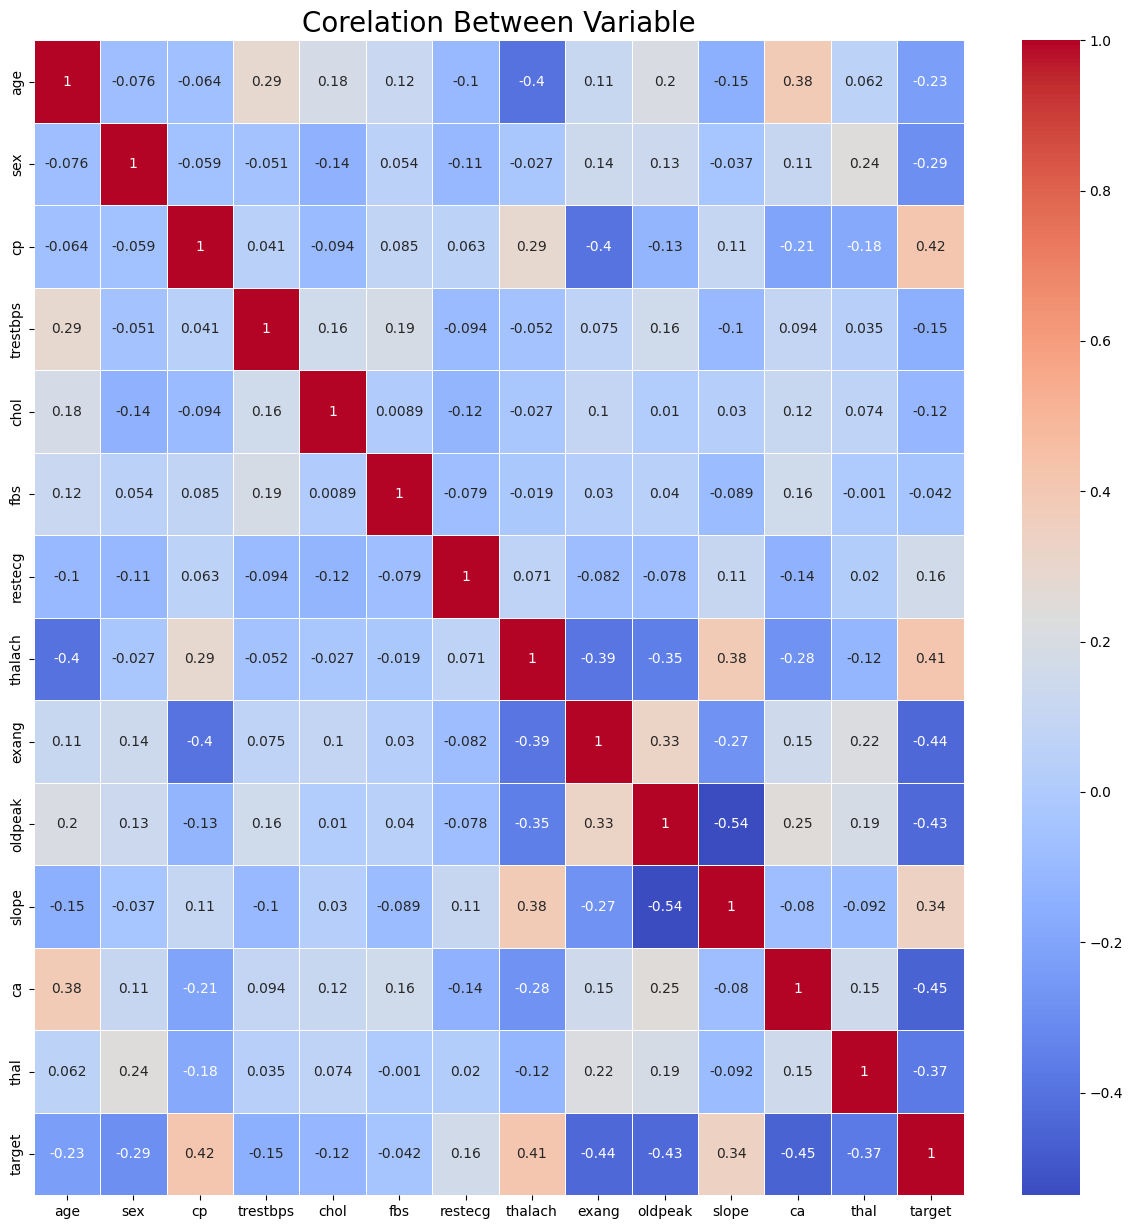

In [45]:
# Show corelation 
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.4, cmap="coolwarm")
plt.title('Corelation Between Variable', fontsize = 20)
plt.show()

In [46]:
cor_matrix = df.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.075938,-0.063675,0.287119,0.177738,0.122130,-0.103271,-0.400295,0.114798,0.202572,-0.152354,0.383960,0.061637,-0.228199
sex,-0.075938,1.000000,-0.059119,-0.050535,-0.141056,0.054131,-0.105517,-0.027112,0.137428,0.129683,-0.036620,0.111407,0.241279,-0.291647
cp,-0.063675,-0.059119,1.000000,0.040719,-0.093846,0.084620,0.062529,0.286167,-0.396393,-0.128417,0.105619,-0.205857,-0.178061,0.416037
trestbps,0.287119,-0.050535,0.040719,1.000000,0.156105,0.187043,-0.093580,-0.052180,0.074864,0.159376,-0.100984,0.093682,0.034963,-0.153099
chol,0.177738,-0.141056,-0.093846,0.156105,1.000000,0.008938,-0.124835,-0.026966,0.099518,0.010072,0.029677,0.117086,0.074469,-0.115931
fbs,0.122130,0.054131,0.084620,0.187043,0.008938,1.000000,-0.079142,-0.019162,0.030287,0.040323,-0.089389,0.158084,-0.001026,-0.042272
restecg,-0.103271,-0.105517,0.062529,-0.093580,-0.124835,-0.079142,1.000000,0.070973,-0.081675,-0.077662,0.109118,-0.135107,0.020409,0.163927
thalach,-0.400295,-0.027112,0.286167,-0.052180,-0.026966,-0.019162,0.070973,1.000000,-0.388073,-0.352555,0.382601,-0.284136,-0.118065,0.412215
exang,0.114798,0.137428,-0.396393,0.074864,0.099518,0.030287,-0.081675,-0.388073,1.000000,0.325332,-0.274695,0.150918,0.218939,-0.437542
oldpeak,0.202572,0.129683,-0.128417,0.159376,0.010072,0.040323,-0.077662,-0.352555,0.325332,1.000000,-0.536645,0.247428,0.189153,-0.434354


Conclusion
1. 'cp', 'thalach', dan 'slope'  quite strong positive correlation with 'target'.
2. 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age'  quite strong negative correlation with 'target'.
3. 'fbs', 'chol', 'trestbps', dan 'restecg' has a weak correlation with 'target'.

Selected feature :'cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' for further analysis.

In [47]:
# Insert selected features
variabel = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age']
analyze = df[variabel]

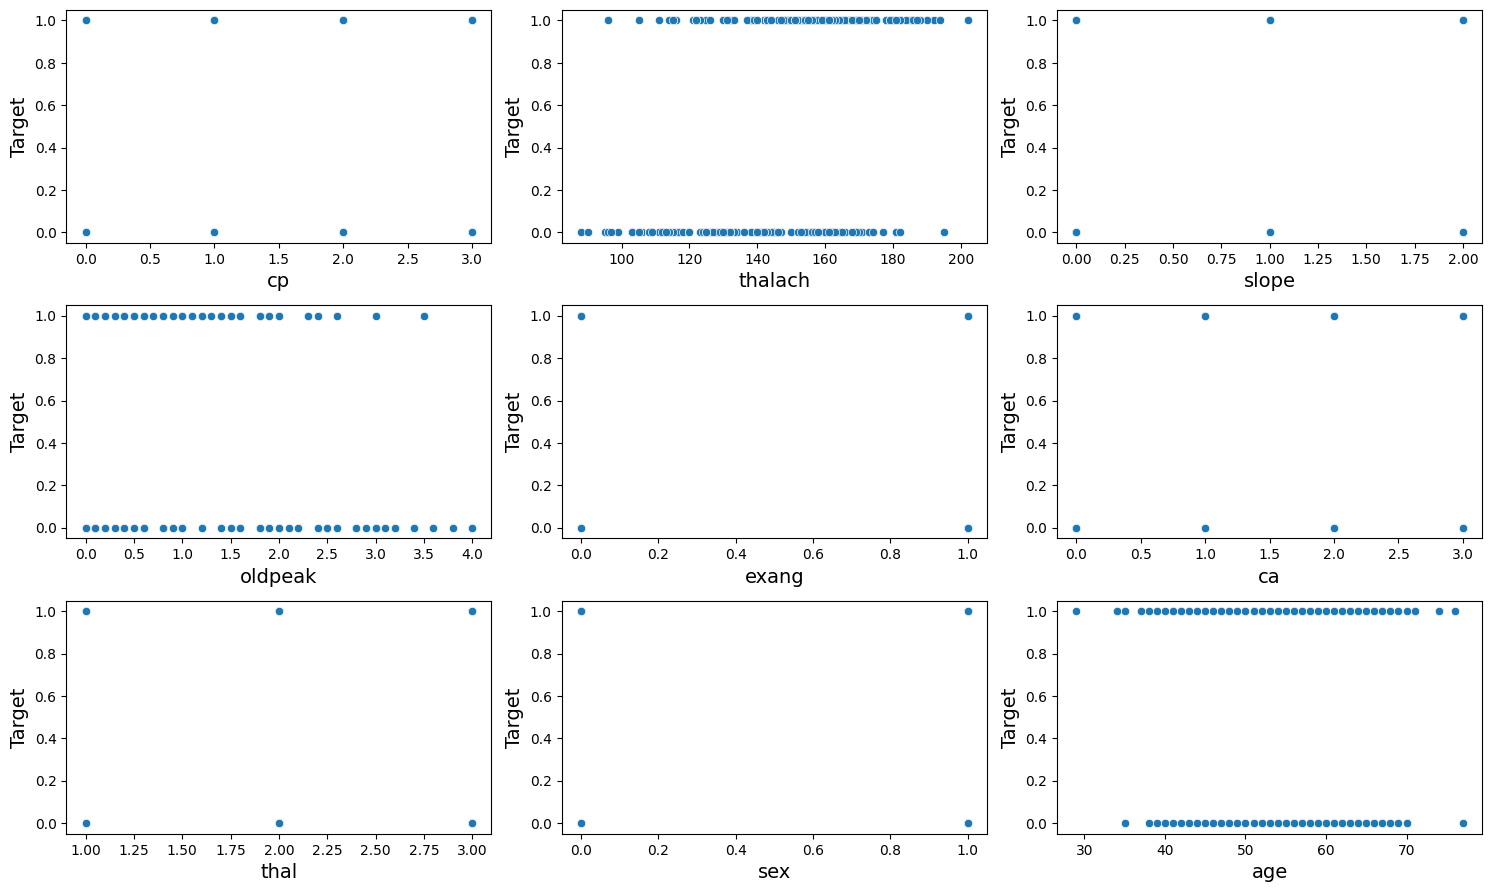

In [48]:
# See informations
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=df.target,data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

### Scaling data

In [49]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("target", axis=1))

In [51]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.241613,0.669150,-0.950434,-0.362140,-0.695274,-0.422064,0.906430,0.794148,-0.701646,0.036623,0.961052,1.507546,1.176822
1,-0.131410,0.669150,-0.950434,0.497893,-0.896348,2.369311,-1.018907,0.219719,1.425219,2.052842,-2.368306,-0.708090,1.176822
2,1.742035,0.669150,-0.950434,0.784570,-1.544252,-0.422064,0.906430,-1.105885,1.425219,1.572789,-2.368306,-0.708090,1.176822
3,0.750211,0.669150,-0.950434,0.956577,-0.896348,-0.422064,0.906430,0.484840,-0.701646,-0.923482,0.961052,0.399728,1.176822
4,0.860414,-1.494434,-0.950434,0.383222,1.136730,2.369311,0.906430,-1.945434,-0.701646,0.900716,-0.703627,2.615364,-0.552749
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.521630,-1.494434,0.997286,-0.648817,-0.717616,-0.422064,-1.018907,-1.547753,-0.701646,0.516675,-0.703627,-0.708090,-0.552749
287,-1.123234,-1.494434,0.997286,-1.336843,-2.281522,-0.422064,0.906430,1.103455,-0.701646,-0.347419,-0.703627,-0.708090,-0.552749
288,-0.241613,0.669150,-0.950434,-0.190133,0.265411,-0.422064,0.906430,0.484840,1.425219,-0.923482,0.961052,0.399728,1.176822
289,0.529806,0.669150,1.971146,1.644603,0.667558,-0.422064,-1.018907,-1.105885,-0.701646,-0.923482,0.961052,-0.708090,-0.552749


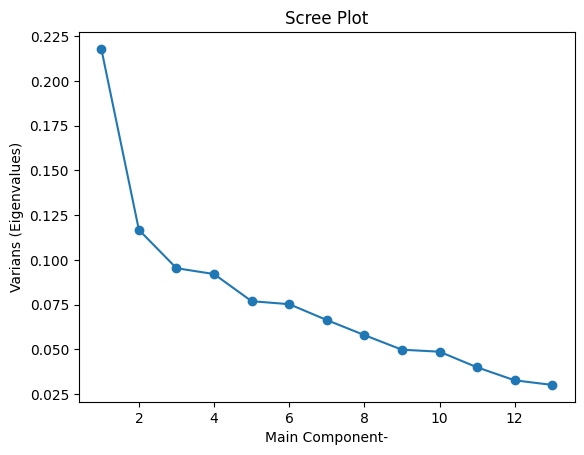

In [52]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Main Component-')
plt.ylabel('Varians (Eigenvalues)')
plt.title('Scree Plot')
plt.show()

In [53]:
# Reduce to 9 
pca = PCA(n_components=9)
dataReduced = pca.fit_transform(X_scaled)

In [54]:
feature_names = df.drop('target', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['oldpeak', 'exang', 'ca', 'age', 'thal', 'trestbps', 'chol', 'sex', 'fbs']
PC2: ['sex', 'thal', 'exang', 'restecg', 'oldpeak', 'thalach', 'slope', 'ca', 'cp']
PC3: ['cp', 'oldpeak', 'fbs', 'sex', 'trestbps', 'thalach', 'restecg', 'age', 'thal']
PC4: ['restecg', 'oldpeak', 'age', 'exang', 'chol', 'cp', 'trestbps', 'ca', 'thalach']
PC5: ['restecg', 'ca', 'age', 'slope', 'thal', 'fbs', 'cp', 'sex', 'oldpeak']
PC6: ['thal', 'restecg', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp', 'exang', 'fbs']
PC7: ['fbs', 'exang', 'restecg', 'trestbps', 'slope', 'thalach', 'chol', 'ca', 'sex']
PC8: ['trestbps', 'slope', 'sex', 'age', 'exang', 'restecg', 'thalach', 'oldpeak', 'thal']
PC9: ['thal', 'age', 'cp', 'fbs', 'exang', 'slope', 'sex', 'chol', 'trestbps']


## Section 3

### Modeling

In [55]:
# show data
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [56]:
# filter to selected feature
df = df[['sex', 'cp', 'age', 'restecg', 'exang', 'fbs', 'thal', 'ca','target']]

# show data
df

,sex,cp,age,restecg,exang,fbs,thal,ca,target
0,1,0,52,1,0,0,3,2,0
1,1,0,53,0,1,1,3,0,0
2,1,0,70,1,1,0,3,0,0
3,1,0,61,1,0,0,3,1,0
4,0,0,62,1,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...
723,0,2,68,0,0,0,2,0,1
733,0,2,44,1,0,0,2,0,1
739,1,0,52,1,1,0,3,1,0
843,1,3,59,0,0,0,2,0,0


In [57]:
df.to_csv('d.csv')

In [58]:
# Declare X & y
X = df[['sex', 'cp', 'age', 'restecg', 'exang', 'fbs', 'thal', 'ca']]
y = df['target']

In [59]:
# show X
X.head()

,sex,cp,age,restecg,exang,fbs,thal,ca
0,1,0,52,1,0,0,3,2
1,1,0,53,0,1,1,3,0
2,1,0,70,1,1,0,3,0
3,1,0,61,1,0,0,3,1
4,0,0,62,1,0,1,2,3


In [60]:
# show y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [61]:
# Scaling with standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
# Show accuracy score
def Search(models, X_train, y_train, X_test, y_test):
    model = models()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print()
    print('-------------------------------------------------------------------')
    print(f"Accuracy Score of {models()} is {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print()
    print('-------------------------------------------------------------------')


In [64]:
Search(LogisticRegression, X_train, y_train, X_test, y_test)
Search(DecisionTreeClassifier, X_train, y_train, X_test, y_test)
Search(RandomForestClassifier, X_train, y_train, X_test, y_test)
Search(MLPClassifier, X_train, y_train, X_test, y_test)


-------------------------------------------------------------------
Accuracy Score of LogisticRegression() is 0.7627118644067796
              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.72      0.91      0.81        32

    accuracy                           0.76        59
   macro avg       0.78      0.75      0.75        59
weighted avg       0.78      0.76      0.76        59


-------------------------------------------------------------------

-------------------------------------------------------------------
Accuracy Score of DecisionTreeClassifier() is 0.6949152542372882
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        27
           1       0.68      0.84      0.75        32

    accuracy                           0.69        59
   macro avg       0.71      0.68      0.68        59
weighted avg       0.70      0.69      0.69        59


------------

Dapat dilihat dari hasil tes akurasi tersebut adalah sebagai berikut
1. LogisticRegression()         = 0.7627118644067796
2. DecisionTreeClassifier()     = 0.6949152542372882
3. RandomForestClassifier()     = 0.7796610169491526
4. MLPClassifier()              = 0.7796610169491526


dari hasil tersebut tanpa melakukan hyperparameter tuning Random Forest & MLP merupakan yang terbesar disusul oleh Logistic Regression dan terakhir Decision Tree

In [65]:
# Hyperparameter Tuning
def Tunning(X_train, y_train, X_test, y_test, classifier_type):
    if classifier_type == 'logistic':
        clf = LogisticRegression()
        param_grid = {
            'max_iter': [100, 200, 300],
            'multi_class': ['auto', 'ovr', 'multinomial'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
        }
    elif classifier_type == 'random_forest':
        clf = RandomForestClassifier()
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'criterion': ['gini', 'entropy']
        }
    elif classifier_type == 'decision_tree':
        clf = DecisionTreeClassifier()
        param_grid = {
            'min_samples_leaf': [1, 2, 3, 4, 5],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'criterion': ['gini', 'entropy']
        }
    elif classifier_type == 'mlp':
        clf = MLPClassifier()
        param_grid = {
            'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
            'activation': ['logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs','sgd','adam']
        }

    gsl = GridSearchCV(
        estimator=clf,
        param_grid=param_grid,
        cv=5,
        n_jobs=1,
        scoring='roc_auc'
    )

    fit_clf = gsl.fit(X_train, y_train)
    print('------------------------------------------------------------------------------------------------')
    print(classifier_type)
    print("Best parameters:", fit_clf.best_params_)
    print("Best ROC-AUC score:", fit_clf.best_score_)

    y_pred = fit_clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    print()
    print('------------------------------------------------------------------------------------------------')
    return fit_clf


logReg = Tunning(X_train, y_train, X_test, y_test, 'logistic')
RFore = Tunning(X_train, y_train, X_test, y_test, 'random_forest')
DTree = Tunning(X_train, y_train, X_test, y_test, 'decision_tree')
Mlps = Tunning(X_train, y_train, X_test, y_test, 'mlp')


------------------------------------------------------------------------------------------------
logistic
Best parameters: {'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best ROC-AUC score: 0.9001904761904763
              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.72      0.91      0.81        32

    accuracy                           0.76        59
   macro avg       0.78      0.75      0.75        59
weighted avg       0.78      0.76      0.76        59


------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
random_forest
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Best ROC-AUC score: 0.9254908424908423
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        27
           1     

Setelah melakukan Hyperparameter tuning terdapat beberapa perubahan terhadap nilai akurasi nya
1. Logistic Regresion 0.76 > 0.76
2. Decision Tree 0.69 > 0.71
3. Random Forest 0.77 > 0.75
4. MLP 0.77 > 0.80

In [66]:
# Proba
y_pred_l = logReg.predict_proba(X_test)[:,1]
y_pred_r = RFore.predict_proba(X_test)[:,1]
y_pred_d = DTree.predict_proba(X_test)[:,1]
y_pred_m = Mlps.predict_proba(X_test)[:,1]

auc_l = roc_auc_score(y_test, y_pred_l)
auc_r = roc_auc_score(y_test, y_pred_r)
auc_d = roc_auc_score(y_test, y_pred_d)
auc_m = roc_auc_score(y_test, y_pred_m)

print(f"AUC-ROC for Logistic Regression   : {auc_l}")
print(f"AUC-ROC for Random Forest         : {auc_r}")
print(f"AUC-ROC for Decission Tree        : {auc_d}")
print(f"AUC-ROC for MLP                   : {auc_m}")

AUC-ROC for Logistic Regression   : 0.8125
AUC-ROC for Random Forest         : 0.8582175925925926
AUC-ROC for Decission Tree        : 0.7332175925925926
AUC-ROC for MLP                   : 0.8252314814814814


Hasil dari test score AUC-ROC dari yang terbesar adalah
1. Random Forest 0.85
2. MLP 0.82
3. Logistic Regression 0.81
4. Decision Tree 0.73

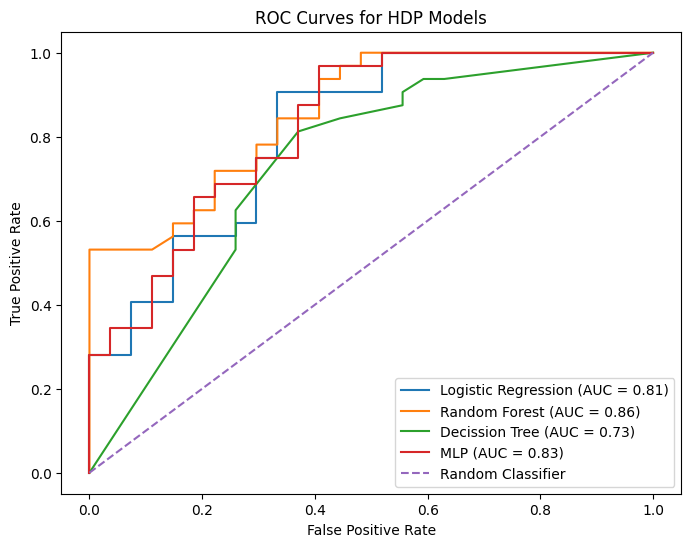

In [67]:
# ROC Analisys
def plotRoc(y_test, y_pred_l, y_pred_r, y_pred_d, y_pred_m):
    plt.figure(figsize=(8,6))
    
    fpr_l, tpr_l, _ = roc_curve(y_test, y_pred_l)
    fpr_r, tpr_r, _ = roc_curve(y_test, y_pred_r)
    fpr_d, tpr_d, _ = roc_curve(y_test, y_pred_d)
    fpr_m, tpr_m, _ = roc_curve(y_test, y_pred_m)
    
    # 
    plt.plot(fpr_l, tpr_l, label=f'Logistic Regression (AUC = {auc_l:.2f})')
    plt.plot(fpr_r, tpr_r, label=f'Random Forest (AUC = {auc_r:.2f})')
    plt.plot(fpr_d, tpr_d, label=f'Decission Tree (AUC = {auc_d:.2f})')
    plt.plot(fpr_m, tpr_m, label=f'MLP (AUC = {auc_m:.2f})')
    
    # plot
    plt.plot([0,1],[0,1], linestyle='--', label='Random Classifier')
    
    # show
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for HDP Models')
    plt.legend()
    plt.show()

plotRoc(y_test, y_pred_l, y_pred_r, y_pred_d, y_pred_m)

In [68]:
# find treshold
tresholds = np.arange(0, 1.1,0.1)
def rateTreshold(y_pred, y_test, tresholds):
    fpr_list = []
    tpr_list = []
    for t in tresholds:
        y_binary = (y_pred > t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

fpr_l, tpr_l = rateTreshold(y_pred_l, y_test, tresholds)
fpr_r, tpr_r = rateTreshold(y_pred_r, y_test, tresholds)
fpr_d, tpr_d = rateTreshold(y_pred_d, y_test, tresholds)
fpr_m, tpr_m = rateTreshold(y_pred_m, y_test, tresholds)

# turn into dataframe
sDf = pd.DataFrame({
    'Treshold' : tresholds,
    'Logistic Regression FPR' : fpr_l,
    'Logistic Regression TPR' : tpr_l,
    'Random Forest FPR' : fpr_r,
    'Random Forest TPR' : tpr_r,
    'Decision Tree FPR' : fpr_d,
    'Decision Tree TPR' : tpr_d,
    'MLP FPR' : fpr_m,
    'MLP TPR' : tpr_m
})

sDf


,Treshold,Logistic Regression FPR,Logistic Regression TPR,Random Forest FPR,Random Forest TPR,Decision Tree FPR,Decision Tree TPR,MLP FPR,MLP TPR
0,0.0,1.000000,1.00000,0.962963,1.00000,0.629630,0.93750,1.000000,1.00000
1,0.1,0.666667,1.00000,0.666667,1.00000,0.629630,0.93750,0.629630,1.00000
2,0.2,0.629630,1.00000,0.518519,1.00000,0.592593,0.93750,0.592593,1.00000
3,0.3,0.592593,1.00000,0.481481,1.00000,0.592593,0.93750,0.407407,0.96875
4,0.4,0.518519,0.93750,0.481481,0.96875,0.555556,0.87500,0.407407,0.96875
5,0.5,0.407407,0.90625,0.407407,0.87500,0.444444,0.84375,0.407407,0.96875
6,0.6,0.333333,0.81250,0.333333,0.81250,0.370370,0.81250,0.370370,0.87500
7,0.7,0.296296,0.75000,0.296296,0.75000,0.370370,0.81250,0.296296,0.75000
8,0.8,0.259259,0.59375,0.222222,0.62500,0.259259,0.62500,0.222222,0.65625
9,0.9,0.074074,0.40625,0.000000,0.50000,0.259259,0.53125,0.111111,0.46875


In [69]:
# try to find best treshold
def bestTreshold(y_test, y_pred):
    fpr, tpr, tresholds = roc_curve(y_test, y_pred)
    
    y = tpr - fpr
    optimal_idx = np.argmax(y)
    return tresholds[optimal_idx]

best_treshold_l = bestTreshold(y_test, y_pred_l)
best_treshold_r = bestTreshold(y_test, y_pred_r)
best_treshold_d = bestTreshold(y_test, y_pred_d)
best_treshold_m = bestTreshold(y_test, y_pred_m)

print(f"Best Treshold for Logistic Regression   : {best_treshold_l}")
print(f"Best Treshold for Random Forest         : {best_treshold_r}")
print(f"Best Treshold for Decission Tree        : {best_treshold_d}")
print(f"Best Treshold for MLP                   : {best_treshold_m}")

Best Treshold for Logistic Regression   : 0.5722505395124633
Best Treshold for Random Forest         : 0.895
Best Treshold for Decission Tree        : 0.8
Best Treshold for MLP                   : 0.5062315237880268


Hasil dari pencarian Treshold atau ambang batas terbaik adalah sebagai berikut
1. MLP 0.50
2. Logistic Regression 0.57
3. Decision Tree 0.8
4. Random Forest 0.89

## Kesimpulan

Melihat dari hasil bahwa setelah melakukan Hyperparameter Tunning jika MLP menjadi yang terbesar, kemudian score AUC-ROC nya juga cukup besar dan yang terakhir adalah mempertimbangkan jika MLP model cukup sensitif maka dipilihlah Model MLP Sebagai model Final nya.

**Kenapa MLP yang dipilih?**,
Hal ini disebabkan karena tujuan dari pemodelan ini menghindari sebanyak mungkin pasein dengan penyakit jantung di diagnosa tidak terkena. Dan model MLP sudah cukup sensitif untuk menghindari hal tersebut.

**Featur-feature yang dipilih adalah**
1. sex (0,1)
2. age (29,77)
3. cp (0,3)
4. restecg (0,2)
5. exang (0,1)
6. fbs (0,1)
7. thal (1,3)
8. ca (0,3)

In [73]:
#  export model MLP to pickle 
# pklname = 'MLPModel.pkl'

# with open(pklname,'wb') as file:
#     pickle.dump(Mlps, file)

In [122]:
# loading saved model
model = pickle.load(open('MLPModel.pkl','rb'))

In [284]:
# Define the ranges for each feature
feature1_range = (0, 1)     # sex
feature2_range = (0, 3)     # cp
feature3_range = (30, 70)   # age
feature4_range = (0, 2)     # restecg
feature5_range = (0, 1)     # exang
feature6_range = (0, 1)     # fbs
feature7_range = (1, 3)     # thal
feature8_range = (0, 3)     # ca

# Generate random values for each feature within the defined range
random_data = (
    random.randint(feature1_range[0], feature1_range[1]),
    random.randint(feature2_range[0], feature2_range[1]),
    random.randint(feature3_range[0], feature3_range[1]),
    random.randint(feature4_range[0], feature4_range[1]),
    random.randint(feature5_range[0], feature5_range[1]),
    random.randint(feature6_range[0], feature6_range[1]),
    random.randint(feature7_range[0], feature7_range[1]),
    random.randint(feature8_range[0], feature8_range[1])
)

# Display the generated random data
print(random_data)

# example usage
input_data = random_data
i = np.asarray(input_data)
i_r = i.reshape(1,-1)

predictoons = model.predict(i_r)
print(predictoons)
if(predictoons[0] == 0):
    print('The Person is not Heart Disease')
else:
    print('The Person is Heart Disease')

(1, 2, 58, 0, 1, 1, 3, 2)
[0]
The Person is not Heart Disease
